# Topic 2: Recommendation System
### Demo: Underthesea, Gemsim, Cosin Similarity

In [4]:
!pip install gensim
!pip install pyvi
# !pip install underthesea

In [2]:
# Note: Có thể tùy chọn các thư viện xử lý tiếng Việt

In [9]:
!pip install numpy==1.26.4



  Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.0 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.1 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
# from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
from gensim import corpora, models, similarities
import re
from pyvi.ViTokenizer import tokenize

In [ ]:
!pip install numpy==1.26.4 pandas==2.0.3

In [2]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


In [3]:
STOP_WORD_FILE = '/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/Project_2/data_input/vietnamese-stopwords.txt'
teen_code_file = '/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/Project_2/data_input/teencode.txt'
english_vnmese_file = '/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/Project_2/data_input/english-vnmese.txt'
wrong_word_file = '/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/Project_2/data_input/wrong-word.txt'
emoji_file = '/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/Project_2/data_input/emojicon.txt'

In [4]:
path1='/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/Project_2/data_input/hotel_comments.csv'
path2= '/content/gdrive/MyDrive/DL07_ĐỒ_ÁN_DS/Project_2/data_input/hotel_info.csv'

In [5]:
# Dữ liệu thử nghiệm
cmt = pd.read_csv(path1)
info = pd.read_csv(path2)

In [6]:
cmt.columns

Index(['num', 'Hotel ID', 'Reviewer ID', 'Reviewer Name', 'Nationality',
       'Group Name', 'Room Type', 'Stay Details', 'Score', 'Score Level',
       'Title', 'Body', 'Review Date'],
      dtype='object')

In [7]:
info.columns

Index(['num', 'Hotel_ID', 'Hotel_Name', 'Hotel_Rank', 'Hotel_Address',
       'Total_Score', 'Location', 'Cleanliness', 'Service', 'Facilities',
       'Value_for_money', 'Comfort_and_room_quality', 'comments_count',
       'Hotel_Description'],
      dtype='object')

In [8]:
info.head()

,num,Hotel_ID,Hotel_Name,Hotel_Rank,Hotel_Address,Total_Score,Location,Cleanliness,Service,Facilities,Value_for_money,Comfort_and_room_quality,comments_count,Hotel_Description
0,1,1_1,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5 sao trên 5,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam","8,8","9,4","8,9","8,9","8,7","8,7","8,3",1269,Khách sạn Mường Thanh Luxury Nha Trang - Nơi l...
1,2,1_2,ALPHA BIRD NHA TRANG,4 sao trên 5,"51/19/37 Tue Tinh St, Loc Tho Ward, Nha Trang,...","7,7","7,8","7,6","8,1","7,5","8,1",NaN,337,ALPHA BIRD NHA TRANG - Khách sạn 4.0 sao tại N...
2,3,1_3,Khách sạn Aaron (Aaron Hotel),3.5 sao trên 5,"6Trần Quang Khải, Lộc Thọ, Nha Trang, Việt Nam...","8,5","8,9","8,7","8,8","8,1","8,5",NaN,300,Khách sạn Aaron - Nơi nghỉ dưỡng tuyệt vời tại...
3,4,1_4,Panorama Star Beach Nha Trang,5 sao trên 5,"02 Nguyen Thi Minh Khai, Lộc Thọ, Nha Trang, V...","8,8","9,6","8,9","8,9","8,7","9,0",NaN,814,Panorama Star Beach Nha Trang - Một kỳ nghỉ tu...
4,5,1_5,Khách sạn Balcony Nha Trang (Balcony Nha Trang...,4 sao trên 5,"98B/13 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam","8,4","8,5","8,7","8,5","8,3","8,6","8,7",294,Khách sạn Balcony Nha Trang - Nơi nghỉ dưỡng t...


In [9]:
info.head()

,num,Hotel_ID,Hotel_Name,Hotel_Rank,Hotel_Address,Total_Score,Location,Cleanliness,Service,Facilities,Value_for_money,Comfort_and_room_quality,comments_count,Hotel_Description
0,1,1_1,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,5 sao trên 5,"60 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam","8,8","9,4","8,9","8,9","8,7","8,7","8,3",1269,Khách sạn Mường Thanh Luxury Nha Trang - Nơi l...
1,2,1_2,ALPHA BIRD NHA TRANG,4 sao trên 5,"51/19/37 Tue Tinh St, Loc Tho Ward, Nha Trang,...","7,7","7,8","7,6","8,1","7,5","8,1",NaN,337,ALPHA BIRD NHA TRANG - Khách sạn 4.0 sao tại N...
2,3,1_3,Khách sạn Aaron (Aaron Hotel),3.5 sao trên 5,"6Trần Quang Khải, Lộc Thọ, Nha Trang, Việt Nam...","8,5","8,9","8,7","8,8","8,1","8,5",NaN,300,Khách sạn Aaron - Nơi nghỉ dưỡng tuyệt vời tại...
3,4,1_4,Panorama Star Beach Nha Trang,5 sao trên 5,"02 Nguyen Thi Minh Khai, Lộc Thọ, Nha Trang, V...","8,8","9,6","8,9","8,9","8,7","9,0",NaN,814,Panorama Star Beach Nha Trang - Một kỳ nghỉ tu...
4,5,1_5,Khách sạn Balcony Nha Trang (Balcony Nha Trang...,4 sao trên 5,"98B/13 Trần Phú, Lộc Thọ, Nha Trang, Việt Nam","8,4","8,5","8,7","8,5","8,3","8,6","8,7",294,Khách sạn Balcony Nha Trang - Nơi nghỉ dưỡng t...


In [10]:
info_tmp = info[['Hotel_ID','Hotel_Name','Hotel_Description']]

In [11]:
info_tmp.head()

,Hotel_ID,Hotel_Name,Hotel_Description
0,1_1,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,Khách sạn Mường Thanh Luxury Nha Trang - Nơi l...
1,1_2,ALPHA BIRD NHA TRANG,ALPHA BIRD NHA TRANG - Khách sạn 4.0 sao tại N...
2,1_3,Khách sạn Aaron (Aaron Hotel),Khách sạn Aaron - Nơi nghỉ dưỡng tuyệt vời tại...
3,1_4,Panorama Star Beach Nha Trang,Panorama Star Beach Nha Trang - Một kỳ nghỉ tu...
4,1_5,Khách sạn Balcony Nha Trang (Balcony Nha Trang...,Khách sạn Balcony Nha Trang - Nơi nghỉ dưỡng t...


In [12]:
print(info_tmp.isnull().sum())

Hotel_ID             0
Hotel_Name           0
Hotel_Description    1
dtype: int64


In [13]:
# thay NaN trong text = ""
info_tmp["Hotel_Description"] = info_tmp["Hotel_Description"].fillna("")

/tmp/ipython-input-1565170737.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_tmp["Hotel_Description"] = info_tmp["Hotel_Description"].fillna("")


In [14]:
# đọc stopwords (1 từ mỗi dòng)
with open(STOP_WORD_FILE, 'a', encoding='utf-8') as f:
        f.write(f'\nkhách_sạn')

with open(STOP_WORD_FILE, 'r', encoding='utf-8') as f:
    stopwords = set([line.strip() for line in f if line.strip()])

def load_dict_from_txt(file_path):
    mapping = {}
    with open(file_path, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(",")  # tách theo dấu phẩy
            if len(parts) == 2:
                mapping[parts[0].strip()] = parts[1].strip()
    return mapping

# load các từ điển thay thế
teen_dict = load_dict_from_txt(teen_code_file)
en_vi_dict = load_dict_from_txt(english_vnmese_file)
wrong_dict = load_dict_from_txt(wrong_word_file)
emoji_dict = load_dict_from_txt(emoji_file)


In [15]:
from pyvi import ViTokenizer

In [16]:
def preprocess_text(text, remove_stopwords=True):
    if pd.isna(text):
        return ["unk"]   # fallback cho dữ liệu trống

    text = text.lower().strip()

    # thay teen code
    for k, v in teen_dict.items():
        text = re.sub(r'\b{}\b'.format(re.escape(k)), v, text)

    # dịch từ tiếng Anh sang Việt
    for k, v in en_vi_dict.items():
        text = re.sub(r'\b{}\b'.format(re.escape(k)), v, text)

    # sửa chính tả
    for k, v in wrong_dict.items():
        text = re.sub(r'\b{}\b'.format(re.escape(k)), v, text)

    # chuyển emoji
    for k, v in emoji_dict.items():
        text = text.replace(k, v)

    # bỏ ký tự đặc biệt & số
    text = re.sub(r'[^a-zA-ZÀ-ỹ\s]', ' ', text)

    # tách từ bằng PyVi
    text = ViTokenizer.tokenize(text)

    # tách từ
    tokens = text.split()

    # loại stopwords
    if remove_stopwords:
        tokens = [word for word in tokens if word not in stopwords]

    # fallback nếu tokens rỗng
    if len(tokens) == 0:
        return ["unk"]

    return tokens

In [17]:
tokens_list = []
for desc in info_tmp["Hotel_Description"]:
    tokens = preprocess_text(desc)
    tokens_list.append(tokens)

info_tmp["Hotel_Description_Tokens"] = tokens_list

/tmp/ipython-input-2616108460.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_tmp["Hotel_Description_Tokens"] = tokens_list


In [18]:
info_tmp

,Hotel_ID,Hotel_Name,Hotel_Description,Hotel_Description_Tokens
0,1_1,Khách sạn Mường Thanh Luxury Nha Trang (Muong ...,Khách sạn Mường Thanh Luxury Nha Trang - Nơi l...,"[mường, luxury, nha, trang, lưu_trú, tuyệt_vời..."
1,1_2,ALPHA BIRD NHA TRANG,ALPHA BIRD NHA TRANG - Khách sạn 4.0 sao tại N...,"[alpha, bird, nha, trang, nha, trang, việt_nam..."
2,1_3,Khách sạn Aaron (Aaron Hotel),Khách sạn Aaron - Nơi nghỉ dưỡng tuyệt vời tại...,"[aaron, nghỉ_dưỡng, tuyệt_vời, nha_trang, aaro..."
3,1_4,Panorama Star Beach Nha Trang,Panorama Star Beach Nha Trang - Một kỳ nghỉ tu...,"[panorama, star, beach, nha, trang, kỳ, nghỉ, ..."
4,1_5,Khách sạn Balcony Nha Trang (Balcony Nha Trang...,Khách sạn Balcony Nha Trang - Nơi nghỉ dưỡng t...,"[balcony, nha, trang, nghỉ_dưỡng, tuyệt_vời, n..."
...,...,...,...,...
735,16_5,Victor Condotel Cam Ranh,Victor Condotel Cam Ranh\n\nTận hưởng tất cả n...,"[victor, condotel, cam_ranh, tận_hưởng, nha, t..."
736,30_24,Victor Group - Sam Sam Cam Ranh Condotel,Victor Group - Sam Sam Cam Ranh Condotel\n\nVi...,"[victor, group, sam, sam, cam, ranh, condotel,..."
737,27_21,Victory's House Ngoc Hoa,Victory's House Ngoc Hoa\n\nVictory's House Ng...,"[victory, s, house, ngoc, hoa, victory, s, hou..."
738,8_21,Western Seaview (The Arena Cam Ranh),Western Seaview (The Arena Cam Ranh)\n\nWester...,"[western, seaview, the, arena, cam_ranh, weste..."


# Gemsim

In [19]:
import re

In [20]:
# Obtain the number of features based on dictionary: Use corpora.Dictionary
dictionary = corpora.Dictionary(info_tmp.Hotel_Description_Tokens)

In [21]:
# List of features in dictionary
dictionary.token2id

{'agoda': 0,
 'amart': 1,
 'an': 2,
 'an_toàn': 3,
 'bao_gồm': 4,
 'bar': 5,
 'bay': 6,
 'beach': 7,
 'bed': 8,
 'beds': 9,
 'bia': 10,
 'biển': 11,
 'brewhouse': 12,
 'buffet': 13,
 'bài_tập': 14,
 'bánh': 15,
 'bãi': 16,
 'bóng_chuyền': 17,
 'bơi_lội': 18,
 'bạc': 19,
 'bắc': 20,
 'bể_bơi': 21,
 'bỏ_qua': 22,
 'bồn': 23,
 'bữa': 24,
 'cam': 25,
 'cam_kết': 26,
 'central': 27,
 'chuon': 28,
 'chuyên_nghiệp': 29,
 'chuyến': 30,
 'chân': 31,
 'chân_lý_tưởng': 32,
 'chùa': 33,
 'chú_ý': 34,
 'chăm_sóc': 35,
 'chất_lượng': 36,
 'chỗ': 37,
 'chợ': 38,
 'club': 39,
 'coffee': 40,
 'cuộc_sống': 41,
 'cà_phê': 42,
 'cá_sấu': 43,
 'cát': 44,
 'công_cộng': 45,
 'công_sức': 46,
 'công_viên': 47,
 'căng_thẳng': 48,
 'cơ_sở': 49,
 'cạnh': 50,
 'cảnh_quan': 51,
 'cửa_hàng': 52,
 'da': 53,
 'deluxe': 54,
 'di_chuyển': 55,
 'divers': 56,
 'diện_tích': 57,
 'double': 58,
 'dr': 59,
 'du_khách': 60,
 'du_lịch': 61,
 'duy_trì': 62,
 'dân': 63,
 'dạo': 64,
 'dễ_dàng': 65,
 'dịch_vụ': 66,
 'dịp': 67,
 'dọ

In [22]:
# Numbers of features (word) in dictionary
feature_cnt = len(dictionary.token2id)

In [23]:
feature_cnt

5903

In [24]:
# Obtain corpus based on dictionary (dense matrix)
corpus = [dictionary.doc2bow(text) for text in info_tmp.Hotel_Description_Tokens]

In [25]:
corpus[0] # id, so lan xuat hien cua token trong van ban/ san pham

[(0, 3),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 2),
 (5, 4),
 (6, 1),
 (7, 1),
 (8, 7),
 (9, 2),
 (10, 1),
 (11, 8),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 6),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 2),
 (22, 1),
 (23, 1),
 (24, 2),
 (25, 2),
 (26, 1),
 (27, 2),
 (28, 2),
 (29, 4),
 (30, 2),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 1),
 (35, 4),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 4),
 (43, 1),
 (44, 1),
 (45, 3),
 (46, 1),
 (47, 2),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 5),
 (53, 1),
 (54, 5),
 (55, 3),
 (56, 1),
 (57, 6),
 (58, 4),
 (59, 1),
 (60, 34),
 (61, 6),
 (62, 1),
 (63, 1),
 (64, 2),
 (65, 8),
 (66, 26),
 (67, 1),
 (68, 2),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1),
 (74, 6),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 3),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 4),
 (83, 10),
 (84, 7),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 2),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 3),
 (93, 1),
 (94, 1),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 3),
 (99, 2),
 (100, 

In [27]:
# Use TF-IDF Model to process corpus, obtaining index
tfidf = models.TfidfModel(corpus)
# tính toán sự tương tự trong ma trận thưa thớt
index = similarities.SparseMatrixSimilarity(tfidf[corpus],
                                            num_features = feature_cnt)
# ma tran: n x n

In [28]:
df_1 = pd.DataFrame(index)
df_1

,0,1,2,3,4,5,6,7,8,9,...,730,731,732,733,734,735,736,737,738,739
0,1.000000,0.680935,0.654710,0.613603,0.646139,0.653879,0.551719,0.489316,0.496876,0.175763,...,0.160802,0.542499,0.163184,0.367435,0.148414,0.091007,0.037489,0.047889,0.132609,0.482442
1,0.680935,1.000000,0.707960,0.656724,0.662240,0.667437,0.585251,0.513577,0.528679,0.186350,...,0.156522,0.572841,0.145838,0.394440,0.151845,0.100858,0.040893,0.050942,0.142695,0.503802
2,0.654710,0.707960,1.000000,0.648706,0.695624,0.693819,0.550396,0.519545,0.525247,0.187781,...,0.153322,0.569795,0.165413,0.399946,0.149645,0.094074,0.038618,0.053915,0.161197,0.496946
3,0.613603,0.656724,0.648706,1.000000,0.653807,0.669869,0.498946,0.458265,0.507344,0.160552,...,0.131528,0.529707,0.146552,0.368347,0.134728,0.111510,0.040928,0.048900,0.136950,0.484552
4,0.646139,0.662240,0.695624,0.653807,1.000000,0.651403,0.520749,0.488312,0.509811,0.175684,...,0.168444,0.518975,0.150485,0.357813,0.138758,0.113809,0.040956,0.058174,0.167941,0.449493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.091007,0.100858,0.094074,0.111510,0.113809,0.084091,0.067711,0.087336,0.085391,0.190123,...,0.419369,0.082709,0.228556,0.082047,0.193463,1.000000,0.489332,0.104946,0.211404,0.104098
736,0.037489,0.040893,0.038618,0.040928,0.040956,0.033412,0.033789,0.028355,0.031628,0.104334,...,0.106152,0.037071,0.119905,0.056298,0.117530,0.489332,1.000000,0.077050,0.147209,0.040108
737,0.047889,0.050942,0.053915,0.048900,0.058174,0.058022,0.054197,0.034374,0.052350,0.149893,...,0.103401,0.047065,0.186888,0.042946,0.141126,0.104946,0.077050,1.000000,0.182837,0.044039
738,0.132609,0.142695,0.161197,0.136950,0.167941,0.130415,0.119707,0.111617,0.132409,0.366438,...,0.258314,0.129220,0.418926,0.106787,0.326589,0.211404,0.147209,0.182837,1.000000,0.109035


In [29]:
# giả sử df_1 là ma trận tương đồng n×n, index và columns đều là chỉ số/ID
id = 0
row = df_1.loc[id]

top5 = row.drop(id, errors='ignore').nlargest(5)   # bỏ chính nó
top5_indices = top5.index.tolist()                 # <-- lấy index của Series
print(top5_indices)                               # [chỉ số các item tương tự nhất]

[49, 364, 626, 37, 11]


In [30]:
info_tmp.iloc[0]['Hotel_Name']

'Khách sạn Mường Thanh Luxury Nha Trang (Muong Thanh Luxury Nha Trang Hotel)'

In [31]:
print(f"Recommendations for hotel: {info_tmp.iloc[id]['Hotel_Name']}")
info_tmp.iloc[top5_indices][['Hotel_ID','Hotel_Name','Hotel_Description']]

Recommendations for hotel: Khách sạn Mường Thanh Luxury Nha Trang (Muong Thanh Luxury Nha Trang Hotel)


,Hotel_ID,Hotel_Name,Hotel_Description
49,2_20,Khách sạn V Nha Trang (V Hotel Nha Trang),Khách sạn V Nha Trang - Nơi lưu trú lý tưởng t...
364,6_9,Angella Hotel Nha Trang,Khám phá Angella Hotel Nha Trang - Nơi lưu trú...
626,8_15,Khách sạn Nhi Phi (Nhi Phi Hotel Nha Trang),Khách sạn Nhi Phi - Nơi lưu trú tuyệt vời tại ...
37,2_8,Dubai Nha Trang Hotel,Dubai Nha Trang Hotel - Khách sạn 3.0 sao tại ...
11,1_12,Khách sạn AZURA (Azura Hotel),Khách sạn AZURA - Trải nghiệm thoải mái và tiệ...


In [32]:
# Trường hợp khách hàng nhập thông tin tìm kếm
search_str = "Khách sạn mới, view đẹp, gần biển và có hồ bơi phù hợp với nhu cầu du lịch gia đình"

# Ở đây xem như search_str đã được tiền xử lý
search_str_wt =preprocess_text(search_str)
print(search_str_wt)


['view', 'đẹp', 'biển', 'hồ', 'bơi', 'nhu_cầu', 'du_lịch', 'gia_đình']


In [33]:
# Convert search words into Sparse Vectors
kw_vector = dictionary.doc2bow(search_str_wt)

In [34]:
kw_vector

[(11, 1), (61, 1), (75, 1), (175, 1), (330, 1), (378, 1), (491, 1), (502, 1)]

In [35]:
# similarity calculation
sim = index[tfidf[kw_vector]]

In [36]:
sim

array([0.09627341, 0.09403435, 0.10432382, 0.14818138, 0.09719044,
       0.12680526, 0.05619375, 0.10258634, 0.07002895, 0.01009759,
       0.13079903, 0.07145962, 0.05288246, 0.12509376, 0.10570502,
       0.15250665, 0.09931222, 0.02721744, 0.11290193, 0.09476186,
       0.10645193, 0.11643498, 0.14605007, 0.1563331 , 0.06480883,
       0.01061399, 0.12700152, 0.08485468, 0.18923637, 0.10976882,
       0.09502927, 0.06584601, 0.01357919, 0.12872627, 0.06546322,
       0.06346335, 0.08602674, 0.12003647, 0.04113636, 0.0551116 ,
       0.14938903, 0.02937164, 0.1406205 , 0.17639919, 0.06542608,
       0.09875133, 0.12043052, 0.14267246, 0.05673914, 0.08623971,
       0.1232468 , 0.04099603, 0.13006124, 0.02025099, 0.13039078,
       0.13680261, 0.00824958, 0.07701982, 0.14800452, 0.12794648,
       0.11848139, 0.03659067, 0.12536646, 0.15957919, 0.02135079,
       0.06896376, 0.02290671, 0.06083055, 0.06589638, 0.18262917,
       0.02931281, 0.01117085, 0.13983923, 0.08135289, 0.07350

In [37]:
# sim là numpy array chứa độ tương đồng
# Tạo DataFrame gồm 2 cột: id và sim
df_sim = pd.DataFrame({
    "id": range(len(sim)),
    "sim": sim
})

# Sắp xếp theo sim giảm dần
df_sorted_search = df_sim.sort_values(by="sim", ascending=False)
recommend = df_sorted_search.head()
recommend

,id,sim
667,667,0.207124
485,485,0.195809
28,28,0.189236
69,69,0.182629
454,454,0.177162


In [38]:
recommend.id.to_list()

[667, 485, 28, 69, 454]

In [39]:
result = info_tmp.iloc[recommend.id.to_list()][["Hotel_Name", "Hotel_Description"]]
result

,Hotel_Name,Hotel_Description
667,"Nhà riêng 100 m² 2 phòng ngủ, 2 phòng tắm riên...",Đi đâu cũng gần khi gia đình bạn ở tại địa điể...
485,"Căn hộ 35 m² 1 phòng ngủ, 1 phòng tắm riêng ở ...","Cách biển 10m\nGần chợ ,\ntrung tâm thương mại..."
28,Khách sạn Paris Nha Trang (Paris Nha Trang Hot...,Khách sạn Paris Nha Trang - Nơi lưu trú lý tưở...
69,Khách sạn Dendro Gold (Dendro Gold Hotel ),Khách sạn Dendro Gold - Kỳ nghỉ thú vị tại Nha...
454,Chung cư studio 60 m² có 1 phòng tắm riêng ở L...,Căn hộ 60m2 phù hợp view biển tại tầng 15 phù ...


# Cosine_similarity

In [40]:
info_tmp["Hotel_Description_Joined"] = info_tmp["Hotel_Description_Tokens"].apply(lambda x: " ".join(x))

/tmp/ipython-input-3986714770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_tmp["Hotel_Description_Joined"] = info_tmp["Hotel_Description_Tokens"].apply(lambda x: " ".join(x))


In [41]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vector hóa nội dung
vectorizer = TfidfVectorizer(analyzer='word')
tfidf_matrix = vectorizer.fit_transform(info_tmp.Hotel_Description_Joined)

# Tính toán độ tương đồng
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [42]:
df_show = pd.DataFrame(cosine_sim)
df_show

,0,1,2,3,4,5,6,7,8,9,...,730,731,732,733,734,735,736,737,738,739
0,1.000000,0.819655,0.798448,0.758900,0.789480,0.775250,0.745056,0.699356,0.692981,0.347825,...,0.266829,0.702611,0.265501,0.590061,0.306626,0.187241,0.111318,0.130534,0.282744,0.667079
1,0.819655,1.000000,0.831986,0.792569,0.802097,0.798932,0.770608,0.713579,0.722039,0.357259,...,0.263583,0.733934,0.254006,0.604072,0.307153,0.194847,0.115794,0.148074,0.293696,0.685647
2,0.798448,0.831986,1.000000,0.781286,0.825857,0.815036,0.733829,0.721530,0.715349,0.355944,...,0.254872,0.732047,0.266415,0.608908,0.303715,0.183911,0.100142,0.146232,0.319686,0.674747
3,0.758900,0.792569,0.781286,1.000000,0.785937,0.798322,0.686230,0.662851,0.699764,0.328193,...,0.230552,0.696687,0.249147,0.571713,0.281148,0.206710,0.107524,0.146756,0.286282,0.666514
4,0.789480,0.802097,0.825857,0.785937,1.000000,0.783876,0.713763,0.688712,0.703709,0.338938,...,0.264355,0.693441,0.256528,0.568924,0.291414,0.204945,0.107311,0.154333,0.317963,0.640627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,0.187241,0.194847,0.183911,0.206710,0.204945,0.167296,0.159558,0.173691,0.176976,0.337553,...,0.559360,0.152474,0.356065,0.186921,0.339546,1.000000,0.463010,0.205474,0.328233,0.196604
736,0.111318,0.115794,0.100142,0.107524,0.107311,0.093337,0.106881,0.087706,0.096839,0.222819,...,0.202560,0.087188,0.223195,0.147805,0.242828,0.463010,1.000000,0.153829,0.252782,0.111695
737,0.130534,0.148074,0.146232,0.146756,0.154333,0.146604,0.136562,0.113670,0.140710,0.300050,...,0.210128,0.131121,0.329228,0.123672,0.297618,0.205474,0.153829,1.000000,0.325430,0.137198
738,0.282744,0.293696,0.319686,0.286282,0.317963,0.277058,0.267599,0.257176,0.278270,0.567530,...,0.420770,0.255573,0.607148,0.256540,0.530279,0.328233,0.252782,0.325430,1.000000,0.252139


In [43]:
# Hàm đề xuất khách sạn
# # với mỗi  ks, lấy nums ks tương quan nhất
def get_recommendations(hotel_id, cosine_sim=cosine_sim, nums=5):
    idx = info_tmp.index[info_tmp['Hotel_ID'] == hotel_id][0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:nums+1]
    hotel_indices = [i[0] for i in sim_scores]
    recommendations_df = info_tmp.iloc[hotel_indices].copy()
    recommendations_df['similar_score'] = [i[1] for i in sim_scores]
    return recommendations_df

In [44]:
# Gọi function
hotel_id = '1_5'
hotel_name = info_tmp[info_tmp['Hotel_ID'] == hotel_id]['Hotel_Name'].iloc[0]
print(f"Recommendations for hotel: {hotel_name}")
recommendations = get_recommendations(hotel_id)[['Hotel_ID','Hotel_Name', 'similar_score']]
recommendations

Recommendations for hotel: Khách sạn Balcony Nha Trang (Balcony Nha Trang Hotel)


,Hotel_ID,Hotel_Name,similar_score
622,12_20,Khách sạn Bình An (Binh An Hotel Nha Trang),0.840089
182,15_17,Khách Sạn Seana (Seana Hotel),0.836576
37,2_8,Dubai Nha Trang Hotel,0.832979
631,6_10,Khách sạn Starlet (Starlet Hotel Nha Trang),0.829469
35,2_6,Golden Nha Trang Hotel,0.826353


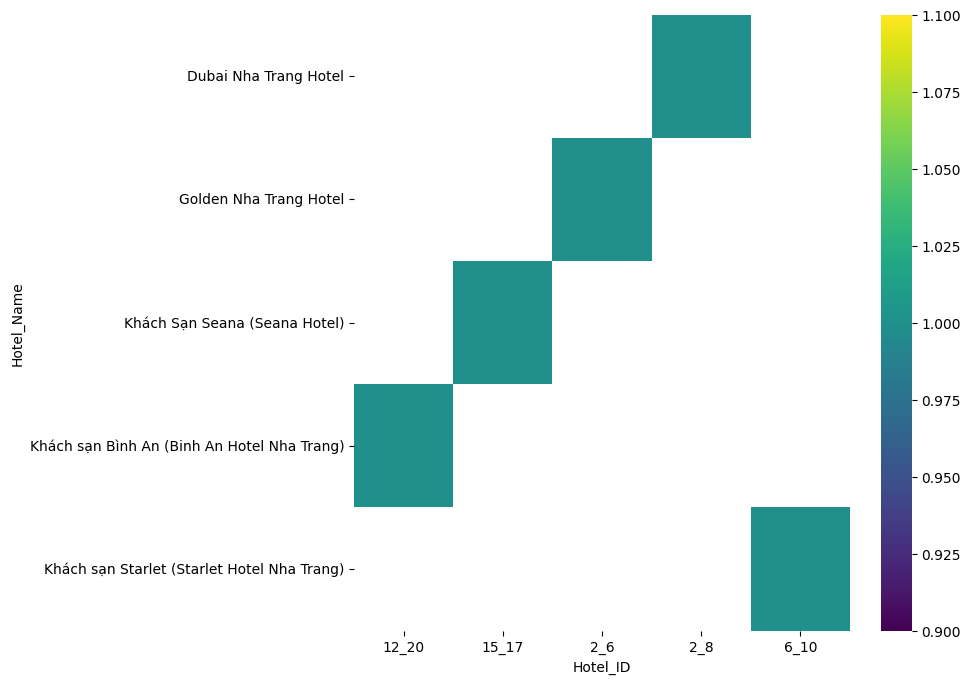

In [45]:
# @title Hotel_ID vs Hotel_Name

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Hotel_Name'].value_counts()
    for x_label, grp in recommendations.groupby('Hotel_ID')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Hotel_ID')
_ = plt.ylabel('Hotel_Name')